In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [ ]:
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data
! chmod 600 ~/.kaggle/kaggle.json




Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 58.0MB/s]
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! unzip 'breast-cancer-wisconsin-data.zip'


Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [ ]:
df_ = pd.read_csv("data.csv", encoding='ISO-8859-1')
df_.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df_.copy()

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop(columns=["Unnamed: 32"],inplace = True)

<Axes: xlabel='diagnosis', ylabel='count'>

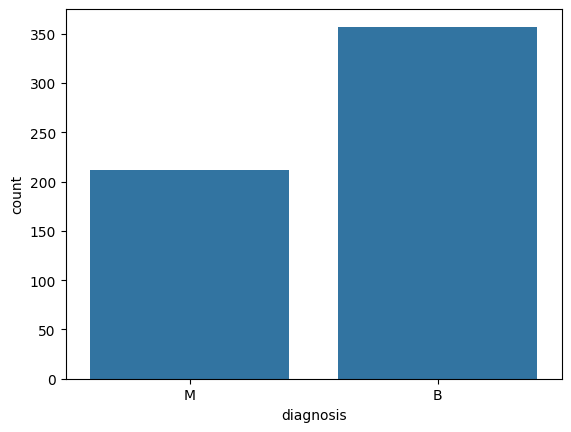

In [ ]:
#Countplot to display diagnosis from magm
import seaborn as sns
sns.countplot(data=df, x='diagnosis')

In [ ]:
##counts of unique rows in the ‘diagnosis’ column
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
X = df.drop(columns='diagnosis', axis=1)
y= df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('accuracy: ',accuracy_score(y_test, y_pred))

confusion matrix:
[[71  0]
 [43  0]]
accuracy:  0.6228070175438597


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # can change the number of neighbors

# Training the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn_classifier.predict(X_test)

# evaluation
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


confusion matrix:
[[63  8]
 [20 23]]
Accuracy: 0.7543859649122807


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # can adjust the number of trees with n_estimators

# Training the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# evaluation
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


confusion matrix:
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544


In [ ]:
from sklearn.svm import SVC #computatinally complex, takes long to load

svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Training the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = svm_classifier.predict(X_test)
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Random forrest showed the best results while the simple logistic regression performed worse.